In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats

In [6]:
df = pd.read_csv("echocardiogram.csv")
df.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [7]:
print(df.isnull().sum())
print(df.shape)

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
name                     2
group                   23
aliveat1                58
dtype: int64
(133, 13)


In [8]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
COLUMNS = ['age', 'pericardialeffusion', 'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score']
X = imp_mean.fit_transform(df[COLUMNS])
df_X = pd.DataFrame(X,
                    columns = COLUMNS)
df_X.shape

(133, 6)

In [9]:
COLUMNS_keep = ['survival', 'alive']
df_keep = df[COLUMNS_keep]
df_keep.shape

(133, 2)

In [10]:
df = pd.concat([df_keep, df_X], axis = 1)
df = df.dropna() 
print(df.isnull().sum())
print(df.shape)

survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
dtype: int64
(130, 8)


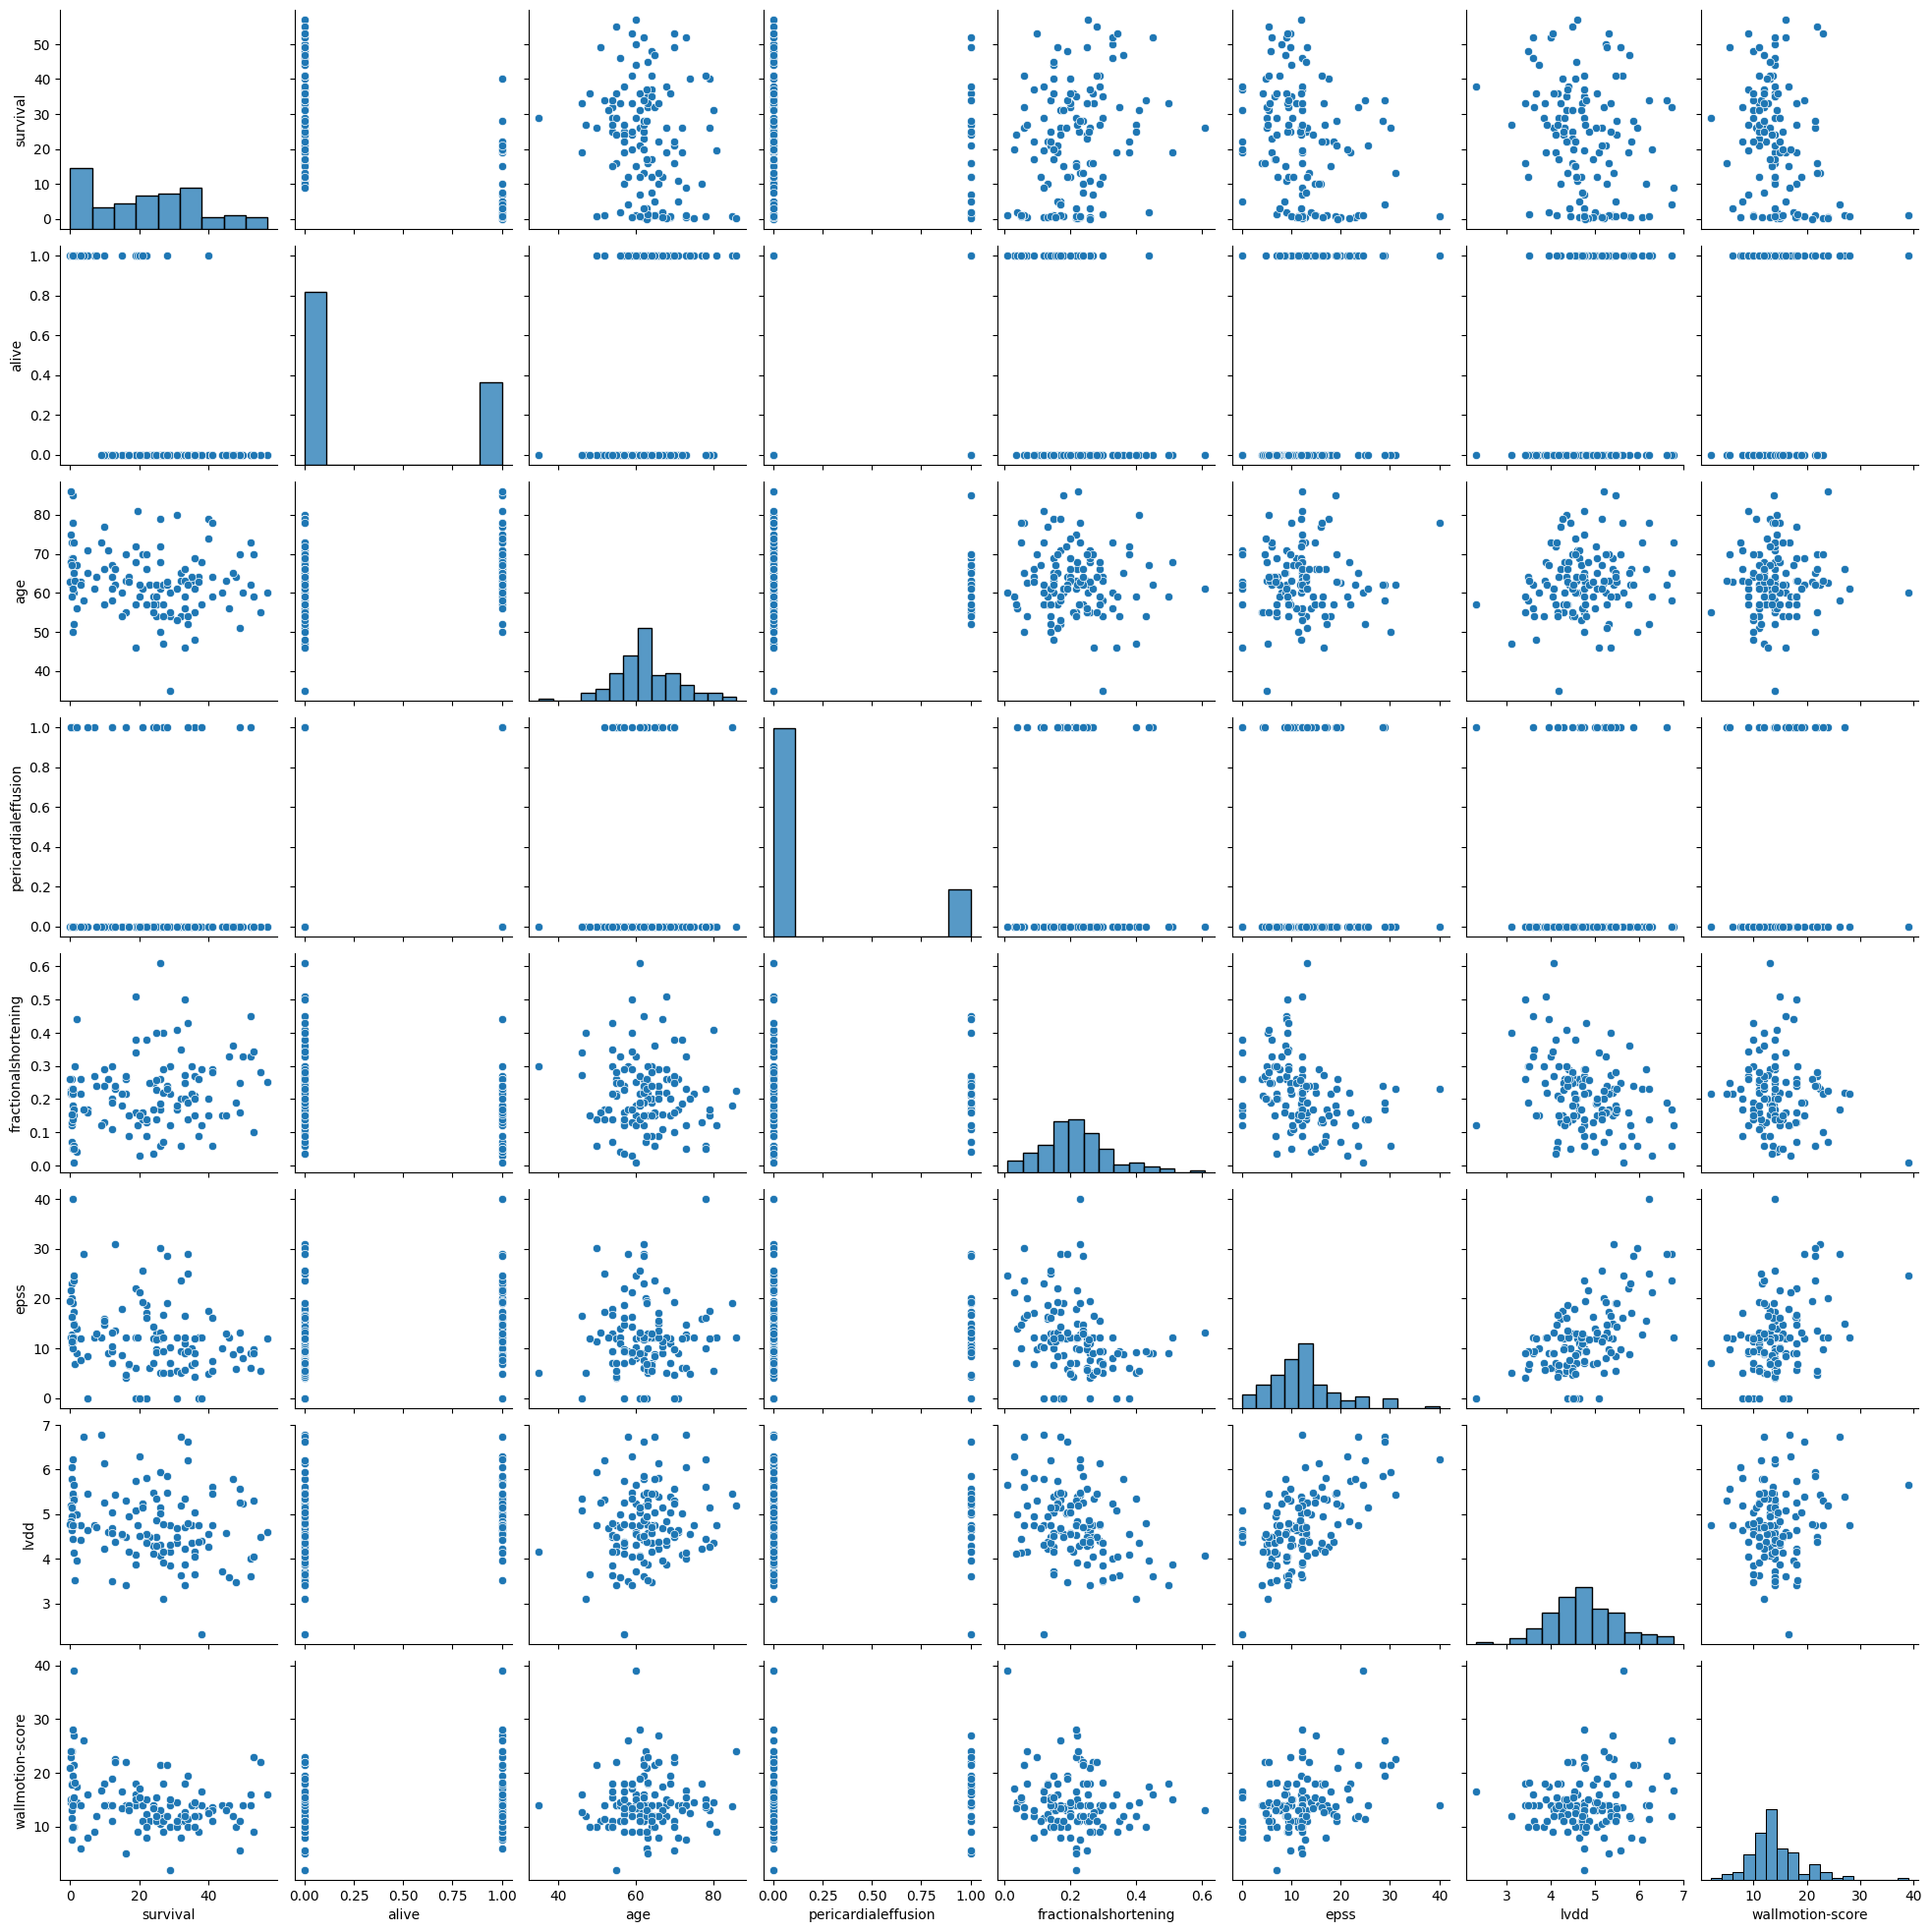

In [11]:
sns.pairplot(df)


In [12]:
df.loc[df.alive == 1, 'dead'] = 0
df.loc[df.alive == 0, 'dead'] = 1
df.groupby('dead').count()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score
dead,,,,,,,,
0.0,42,42,42,42,42,42,42,42
1.0,88,88,88,88,88,88,88,88


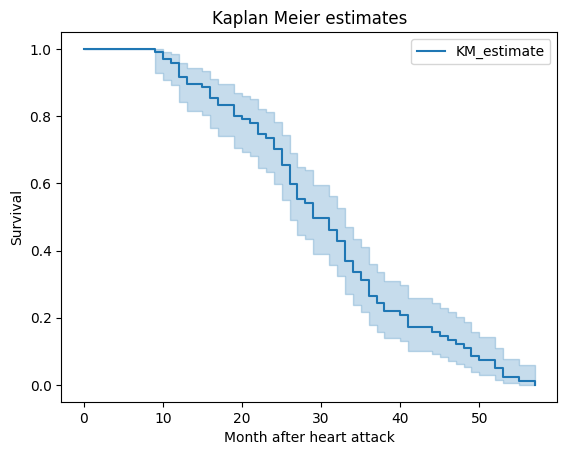

In [13]:
kmf = KaplanMeierFitter()
T = df['survival']
E = df['dead']
kmf.fit(T, event_observed = E)
kmf.plot()
plt.title("Kaplan Meier estimates")
plt.xlabel("Month after heart attack")
plt.ylabel("Survival")
plt.show()

In [14]:
print(statistics.median(df['age']))
print(statistics.median(df['wallmotion-score']))

62.2645
14.0


Text(0, 0.5, 'Survival')

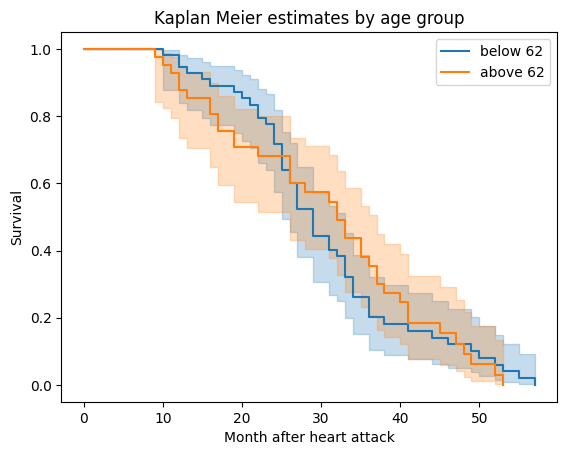

In [15]:
age_group = df['age'] < statistics.median(df['age'])
ax = plt.subplot(111)
kmf.fit(T[age_group], event_observed = E[age_group], label = 'below 62')
kmf.plot(ax = ax)
kmf.fit(T[~age_group], event_observed = E[~age_group], label = 'above 62')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by age group")
plt.xlabel("Month after heart attack")
plt.ylabel("Survival")

In [ ]:
score_group = df['wallmotion-score'] < statistics.median(df['wallmotion-score'])
ax = plt.subplot(111)
kmf.fit(T[score_group], event_observed = E[score_group], label = 'Low score')
kmf.plot(ax = ax)
kmf.fit(T[~score_group], event_observed = E[~score_group], label = 'High score')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimamtes by wallmotion-score group")
plt.xlabel("Month after heart attack")
plt.ylabel("Survival")